# prep

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio
from tqdm import tqdm
import os
import pickle
%load_ext autoreload
%autoreload 2

In [3]:
local_flag = False
if local_flag:
    repo_dir = r'D:\repo\inter_data\inter'.replace("\\", "/") # under env dimred
else:
    repo_dir = r'C:\Users\ll357\Documents\inter'.replace("\\", "/")
os.chdir(repo_dir)
from src import adp

# load 1 recording

In [514]:
date = 220526
mode = 'lindsey'

mat_inter_path = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
meta = pd.read_excel(mat_inter_path + 'adp_dataset_master.xlsx')

date_str = str(date)
mouse_str = meta.loc[meta['date'] == int(date_str), 'mouse'].values#[0]
if len(mouse_str) > 1:
    print('duplicate dates. select which mouse?')
else:
    mouse_str = str(mouse_str[0])
    mouse = int(mouse_str)
print(mouse_str, date_str)

dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'
if mode == 'lindsey':
    dir_data += f'V1_i{mouse_str}_{date}_lindsey'
else:
    dir_data += f'V1_i{mouse_str}_{date}_cellpose'    
stim_id, trace_by_trial = adp.load_trace_trial_data(os.path.join(dir_data), vis_filter=False)

if np.min(stim_id[0]) == 1: # stim id was 1-based index
    stim_id[0] -= 1 # stim id adjusted to 0-based index
assert np.min(stim_id[0]) == 0

1369 220526
ncell: 195, nstim: 5, ntrial: 969, nframe: 167


trace_cell_avg: (167,).         trace_stim_avg list len: 5.         trace_stim_avg[0].shape: (167,)


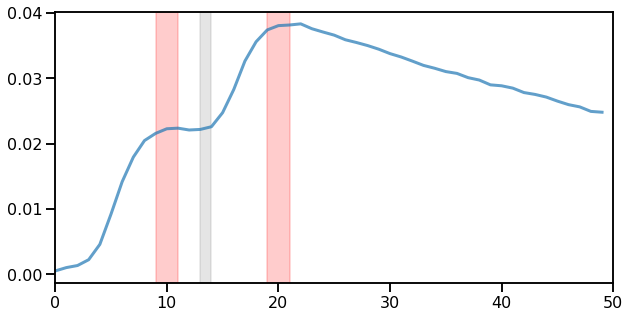

In [516]:
trace_avg_cell, trace_cell_sem, trace_stim_avg = adp.calc_trace_stim(trace_by_trial, stim_id)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(trace_avg_cell[:50], alpha=0.7, linewidth=3)
ax.axvspan(9,11, alpha=0.2, color='red')
ax.axvspan(13,14, alpha=0.2, color='gray')
ax.axvspan(19,21, alpha=0.2, color='red')
plt.xlim(0, 50);

In [517]:
# get resp_ad and resp_tg [cell x trial]

base1 = trace_by_trial[:,:,0:2+1].mean(axis=2) # avg over time window frames
resp_ad = trace_by_trial[:,:,9:11+1].mean(axis=2)
resp_ad = resp_ad - base1

base2 = trace_by_trial[:,:,13:14+1].mean(axis=2)
resp_tg = trace_by_trial[:,:,20:22+1].mean(axis=2)
resp_tg = resp_tg - base2

resp_ad.shape, resp_tg.shape

((195, 969), (195, 969))

# make 1 tidy data

## external data compatible

In [460]:
# list grat SF used in lindsey's data

dir_meta = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
data_meta = pd.read_excel(os.path.join(dir_meta, 'adp_dataset_master.xlsx'))

data_meta = data_meta[data_meta.paradigm == 'grat_SF_lindsey']
meta = data_meta[~data_meta.note.str.contains('bad', na=False)] # exclude bad sessions

SF_lindsey = []
for i in range(len(meta)):
    dir_data_now = os.path.join(
        r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lindsey\Analysis\2P/'.replace("\\", "/"),
        str(meta.iloc[i].date) + r'_i' + str(meta.iloc[i].mouse),
        str(meta.iloc[i].date) + r'_i' + str(meta.iloc[i].mouse) + r'_runs-' + str(meta.iloc[i].num.astype(int)).zfill(3)
    )
    input_mworks = [file for file in os.listdir(dir_data_now) if file.endswith("_input.mat")][0]

    input_mworks = sio.loadmat(os.path.join(dir_data_now, input_mworks))
    SF_cpd = input_mworks['input']['tStimOneGratingSpatialFreqCPD'][0][0][0]
    SF_flat = np.array([SF_cpd[i][0][0] for i in range(len(SF_cpd))])
    SF_lindsey.append(np.unique(SF_flat))
    print(np.round(np.unique(SF_flat), 2))

# np.unique(stim_id[0], return_counts=True) # nrep = 64, enough

[0.02 0.04 0.08 0.16 0.32]
[0.04 0.08 0.16 0.32 0.64]
[0.04 0.08 0.16 0.32 0.64]
[0.03 0.04 0.06 0.08 0.12 0.16 0.23 0.32 0.44 0.62]
[0.03 0.04 0.06 0.08 0.12 0.16 0.23 0.32 0.44 0.62]
[0.03 0.04 0.06 0.08 0.12 0.16 0.23 0.32 0.44 0.62]


In [462]:
# list grat SF used in my data

data_meta = pd.read_excel(os.path.join(dir_meta, 'adp_dataset_master.xlsx'))
data_meta = data_meta[data_meta.paradigm == 'grat_SF6']
meta = data_meta[~data_meta.note.str.contains('bad', na=False)] # exclude bad sessions

for i in range(len(meta)):
    dir_data_now = os.path.join(
        r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Analysis\2P/'.replace("\\", "/"),
        str(meta.iloc[i].date) + r'_i' + str(meta.iloc[i].mouse),
        str(meta.iloc[i].date) + r'_i' + str(meta.iloc[i].mouse) + r'_runs-' + str(meta.iloc[i].num.astype(int)).zfill(3)
    )
    input_mworks = [file for file in os.listdir(dir_data_now) if file.endswith("_input.mat")][0]

    input_mworks = sio.loadmat(os.path.join(dir_data_now, input_mworks))
    # break
    SF_cpd = input_mworks['behav_input']['tStimOneGratingSpatialFreqCPD'][0][0][0]
    SF_ref = np.array([SF_cpd[i][0][0] for i in range(len(SF_cpd))])
    SF_ref = np.unique(SF_ref)
    print(np.round(SF_ref, 2))

[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]
[0.06 0.11 0.19 0.34 0.6  1.08]


## merge SF

In [518]:
dir_data_now = os.path.join(
    r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lindsey\Analysis\2P/'.replace("\\", "/"),
    str(date) + r'_i' + str(mouse),
    str(date) + r'_i' + str(mouse) + r'_runs-' + str(2).zfill(3) # only sess 2 is usable from lindsey's data
)
print(mouse, date)
input_mworks = [file for file in os.listdir(dir_data_now) if file.endswith("_input.mat")][0]

input_mworks = sio.loadmat(os.path.join(dir_data_now, input_mworks))
SF_cpd = input_mworks['input']['tStimOneGratingSpatialFreqCPD'][0][0][0]
SF_flat = np.array([SF_cpd[i][0][0] for i in range(len(SF_cpd))])
SF_lindsey = np.unique(SF_flat)
SF_lindsey

1369 220526


array([0.02, 0.04, 0.08, 0.16, 0.32])

In [519]:
print(np.round(np.unique(SF_ref), 2))
print(np.round(np.unique(SF_lindsey), 2))

# find the closest SF in my data to lindsey's data
stim_dict = {}
for (iSF, SF_cpd) in enumerate(SF_lindsey):
    print(iSF, np.round(SF_cpd, 2), np.argmin(np.abs(SF_ref - SF_cpd)))
    stim_dict[iSF] = np.argmin(np.abs(SF_ref - SF_cpd))
print(stim_dict) # key: lindsey's stim_id, value: my stim_id

# use stim_dict to map stim_id
stim_id_mapped = np.array([stim_dict[i] for i in stim_id[0]])
stim_id[0][:10], stim_id_mapped[:10], 

[0.06 0.11 0.19 0.34 0.6  1.08]
[0.02 0.04 0.08 0.16 0.32]
0 0.02 0
1 0.04 0
2 0.08 0
3 0.16 2
4 0.32 3
{0: 0, 1: 0, 2: 0, 3: 2, 4: 3}


(array([2, 2, 2, 0, 2, 1, 2, 0, 1, 2], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [520]:
R1_dfof = resp_ad.flatten() # cell x trial, row major flatten
R2_dfof = resp_tg.flatten()
dfof = np.hstack((R1_dfof, R2_dfof))

ncell = resp_ad.shape[0]
ntrial = resp_ad.shape[1]
cell_id = np.repeat(np.arange(ncell), ntrial)
cell_id = np.hstack((cell_id, cell_id)) # stack two copies for R1 and R2

trial_id = np.tile(np.arange(ntrial), ncell)
trial_id = np.hstack((trial_id, trial_id))

print(f'{mode} mode')
if mode == 'lindsey':
    stim_id_col = np.tile(stim_id_mapped, ncell)
    stim_id_ori = np.tile(stim_id[0], ncell)
    stim_id_ori = np.hstack((stim_id_ori, stim_id_ori)) # keep record of original stim_id in lindsey's data, to match img_driven (filter_cell_stim)
else:
    stim_id_col = np.tile(stim_id[0], ncell)
stim_id_col = np.hstack((stim_id_col, stim_id_col))

len_df = ncell * ntrial * 2 # 2 for (R1, R2)
resp_id = ['R1'] * (len_df//2) + ['R2'] * (len_df//2) # first half is flattened resp_ad, second half is flattened resp_tg

df_tidy = pd.DataFrame({'dfof': dfof, 'cell_id': cell_id, 'trial_id': trial_id, 'stim_id': stim_id_col, 'resp_id': resp_id})
if mode == 'lindsey':
    df_tidy['stim_id_ori'] = stim_id_ori
df_tidy.head(10)
# TODO: when we need to concat across experiments, can add col for mouse, date, area, session

lindsey mode


,dfof,cell_id,trial_id,stim_id,resp_id,stim_id_ori
0,-0.056804,0,0,0,R1,2
1,0.053659,0,1,0,R1,2
2,0.025820,0,2,0,R1,2
3,0.009575,0,3,0,R1,0
4,0.060440,0,4,0,R1,2
5,-0.009402,0,5,0,R1,1
6,-0.080672,0,6,0,R1,2
7,0.026501,0,7,0,R1,0
8,-0.026308,0,8,0,R1,1
9,-0.047181,0,9,0,R1,2


## trial filter

In [521]:
trial_filter_file = [f for f in os.listdir(dir_data) if f.__contains__('filter_trials_')]
print(trial_filter_file)

trial_ok = np.array([])
for file in trial_filter_file:
    trial_filter = sio.loadmat(os.path.join(dir_data, file))
    trial_eye_ok = trial_filter['trial_eye_ok']
    trial_eye_ok = np.array([i[0] for i in trial_eye_ok], dtype=bool)
    trial_speed_ok = trial_filter['trial_speed_ok']
    trial_speed_ok = np.array([i[0] for i in trial_speed_ok], dtype=bool)
    trial_ok_sess = trial_eye_ok & trial_speed_ok
    trial_ok_sess = trial_ok_sess[:-1] # remove the last trial, which is not a full trial
    trial_ok = np.append(trial_ok, trial_ok_sess)

trial_ok = np.array(trial_ok, dtype=bool)
assert len(trial_ok) == trace_by_trial.shape[1]
# sum(trial_ok), len(trial_ok)

filter_trial = np.tile(trial_ok, ncell)
filter_trial = np.hstack((filter_trial, filter_trial))
df_tidy['filter_trial'] = filter_trial

['filter_trials_by_pupil_or_speed_002.mat']


In [522]:
print(f'trials that passed the filter: {sum(trial_ok)} / {len(trial_ok)}, \
    discarded: {(len(trial_ok) - sum(trial_ok)) / len(trial_ok)*100:.2f}%')

trials that passed the filter: 833 / 969,     discarded: 14.04%


## cell x stim filter
using vis_driven.ipynb  
TODO: refactor it into adp.py

In [523]:
df_tidy['filter_cell'] = np.nan
df_tidy['filter_cell_stim'] = np.nan

with open(os.path.join(dir_data, 'vis_driven.pickle'), 'rb') as f:
    filter_file = pickle.load(f)
filter_cell_stim = filter_file['img_driven']
filter_cell = filter_file['vis_driven']

print(f'ncell = {filter_cell_stim.shape[0]}, nstim = {filter_cell_stim.shape[1]}')
for icell in np.arange(filter_cell_stim.shape[0]):
    df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell'] = filter_cell[icell][0] # filter_cell is a list of list
    for istim in np.arange(filter_cell_stim.shape[1]):
        df_tidy.loc[(df_tidy['stim_id_ori']==istim) & (df_tidy['cell_id']==icell), 'filter_cell_stim'] = filter_cell_stim[icell, istim]
df_tidy.head(5)

ncell = 195, nstim = 5


,dfof,cell_id,trial_id,stim_id,resp_id,stim_id_ori,filter_trial,filter_cell,filter_cell_stim
0,-0.056804,0,0,0,R1,2,True,True,False
1,0.053659,0,1,0,R1,2,True,True,False
2,0.025820,0,2,0,R1,2,True,True,False
3,0.009575,0,3,0,R1,0,True,True,False
4,0.060440,0,4,0,R1,2,True,True,False


## save tidy data

In [524]:
# save to csv
df_tidy.to_csv(os.path.join(dir_data, 'df_tidy.csv'), index=False)

# ls dir_data
os.listdir(dir_data)

['dfof align zoomin.jpg',
 'dfof align.jpg',
 'dfof.mat',
 'dfof_trial.mat',
 'df_tidy.csv',
 'filter_trials_by_pupil_or_speed_002.mat',
 'find_ca_latency_ca_window.jpg',
 'resp_base_trialwise.mat',
 'trace_aligned.mat',
 'trace_trial_stim.mat',
 'vis_driven.pickle']

# batch rewrite df_tidy

In [546]:
# mat_inter_path = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
# meta = pd.read_excel(mat_inter_path + 'adp_dataset_master.xlsx')
# meta = meta[meta.paradigm == 'grat_SF_lindsey']
# meta = meta[~meta.note.str.contains('bad', na=False)] # exclude bad sessions

# for date_now in meta.date.unique():
#     print(date_now)
#     print(meta[meta.date == date_now].mouse.values)
#     mouse = meta[meta.date == date_now].mouse.unique()[0]

#     ## load data
#     dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'
#     if mode == 'lindsey':
#         dir_data += f'V1_i{mouse}_{date_now}_lindsey'
#     else:
#         dir_data += f'V1_i{mouse}_{date_now}_cellpose'    
#     stim_id, trace_by_trial = adp.load_trace_trial_data(os.path.join(dir_data), vis_filter=False)
#     if np.min(stim_id[0]) == 1: # stim id was 1-based index
#         stim_id[0] -= 1 # stim id adjusted to 0-based index
#     assert np.min(stim_id[0]) == 0

#     base1 = trace_by_trial[:,:,0:2+1].mean(axis=2) # avg over time window frames
#     resp_ad = trace_by_trial[:,:,9:11+1].mean(axis=2)
#     resp_ad = resp_ad - base1
#     base2 = trace_by_trial[:,:,13:14+1].mean(axis=2)
#     resp_tg = trace_by_trial[:,:,20:22+1].mean(axis=2)
#     resp_tg = resp_tg - base2

#     ## merge SF
#     dir_data_now = os.path.join(
#         r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lindsey\Analysis\2P/'.replace("\\", "/"),
#         str(date_now) + r'_i' + str(mouse),
#         str(date_now) + r'_i' + str(mouse) + r'_runs-' + str(2).zfill(3) # only sess 2 is usable from lindsey's data
#     )
#     print(mouse, date_now)
#     input_mworks = [file for file in os.listdir(dir_data_now) if file.endswith("_input.mat")][0]
#     input_mworks = sio.loadmat(os.path.join(dir_data_now, input_mworks))
#     SF_cpd = input_mworks['input']['tStimOneGratingSpatialFreqCPD'][0][0][0]
#     SF_flat = np.array([SF_cpd[i][0][0] for i in range(len(SF_cpd))])
#     SF_lindsey = np.unique(SF_flat)

#     data_meta = pd.read_excel(os.path.join(dir_meta, 'adp_dataset_master.xlsx'))
#     data_meta = data_meta[data_meta.paradigm == 'grat_SF6']
#     data_meta = data_meta[~data_meta.note.str.contains('bad', na=False)] # exclude bad sessions
#     for i in range(len(data_meta)):
#         dir_data_now = os.path.join(
#             r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Analysis\2P/'.replace("\\", "/"),
#             str(data_meta.iloc[i].date) + r'_i' + str(data_meta.iloc[i].mouse),
#             str(data_meta.iloc[i].date) + r'_i' + str(data_meta.iloc[i].mouse) + r'_runs-' + str(data_meta.iloc[i].num.astype(int)).zfill(3)
#         )
#         input_mworks = [file for file in os.listdir(dir_data_now) if file.endswith("_input.mat")][0]
#         input_mworks = sio.loadmat(os.path.join(dir_data_now, input_mworks))
#         # break
#         SF_cpd = input_mworks['behav_input']['tStimOneGratingSpatialFreqCPD'][0][0][0]
#         SF_ref = np.array([SF_cpd[i][0][0] for i in range(len(SF_cpd))])
#         SF_ref = np.unique(SF_ref)
#         # print(np.round(SF_ref, 2))

#     stim_dict = {}
#     for (iSF, SF_cpd) in enumerate(SF_lindsey):
#         print(iSF, np.round(SF_cpd, 2), np.argmin(np.abs(SF_ref - SF_cpd)))
#         stim_dict[iSF] = np.argmin(np.abs(SF_ref - SF_cpd))
#     # print(stim_dict) # key: lindsey's stim_id, value: my stim_id
#     stim_id_mapped = np.array([stim_dict[i] for i in stim_id[0]])

#     ## df tidy
#     R1_dfof = resp_ad.flatten() # cell x trial, row major flatten
#     R2_dfof = resp_tg.flatten()
#     dfof = np.hstack((R1_dfof, R2_dfof))

#     ncell = resp_ad.shape[0]
#     ntrial = resp_ad.shape[1]
#     cell_id = np.repeat(np.arange(ncell), ntrial)
#     cell_id = np.hstack((cell_id, cell_id)) # stack two copies for R1 and R2

#     trial_id = np.tile(np.arange(ntrial), ncell)
#     trial_id = np.hstack((trial_id, trial_id))

#     print(f'{mode} mode')
#     if mode == 'lindsey':
#         stim_id_col = np.tile(stim_id_mapped, ncell)
#         stim_id_ori = np.tile(stim_id[0], ncell)
#         stim_id_ori = np.hstack((stim_id_ori, stim_id_ori)) # keep record of original stim_id in lindsey's data, to match img_driven (filter_cell_stim)
#     else:
#         stim_id_col = np.tile(stim_id[0], ncell)
#     stim_id_col = np.hstack((stim_id_col, stim_id_col))

#     len_df = ncell * ntrial * 2 # 2 for (R1, R2)
#     resp_id = ['R1'] * (len_df//2) + ['R2'] * (len_df//2) # first half is flattened resp_ad, second half is flattened resp_tg

#     df_tidy = pd.DataFrame({'dfof': dfof, 'cell_id': cell_id, 'trial_id': trial_id, 'stim_id': stim_id_col, 'resp_id': resp_id})
#     if mode == 'lindsey':
#         df_tidy['stim_id_ori'] = stim_id_ori

#     ## trial filter
#     trial_filter_file = [f for f in os.listdir(dir_data) if f.__contains__('filter_trials_')]

#     trial_ok = np.array([])
#     for file in trial_filter_file:
#         trial_filter = sio.loadmat(os.path.join(dir_data, file))
#         trial_eye_ok = trial_filter['trial_eye_ok']
#         trial_eye_ok = np.array([i[0] for i in trial_eye_ok], dtype=bool)
#         trial_speed_ok = trial_filter['trial_speed_ok']
#         trial_speed_ok = np.array([i[0] for i in trial_speed_ok], dtype=bool)
#         trial_ok_sess = trial_eye_ok & trial_speed_ok
#         trial_ok_sess = trial_ok_sess[:-1] # remove the last trial, which is not a full trial
#         trial_ok = np.append(trial_ok, trial_ok_sess)

#     trial_ok = np.array(trial_ok, dtype=bool)
#     assert len(trial_ok) == trace_by_trial.shape[1]

#     filter_trial = np.tile(trial_ok, ncell)
#     filter_trial = np.hstack((filter_trial, filter_trial))
#     df_tidy['filter_trial'] = filter_trial

#     ## cell filter
#     df_tidy['filter_cell'] = np.nan
#     df_tidy['filter_cell_stim'] = np.nan

#     with open(os.path.join(dir_data, 'vis_driven.pickle'), 'rb') as f:
#         filter_file = pickle.load(f)
#     filter_cell_stim = filter_file['img_driven']
#     filter_cell = filter_file['vis_driven']

#     print(f'ncell = {filter_cell_stim.shape[0]}, nstim = {filter_cell_stim.shape[1]}')
#     for icell in np.arange(filter_cell_stim.shape[0]):
#         df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell'] = filter_cell[icell][0] # filter_cell is a list of list
#         for istim in np.arange(filter_cell_stim.shape[1]):
#             df_tidy.loc[(df_tidy['stim_id_ori']==istim) & (df_tidy['cell_id']==icell), 'filter_cell_stim'] = filter_cell_stim[icell, istim]
    
#     df_tidy.to_csv(os.path.join(dir_data, 'df_tidy.csv'), index=False)
#     print('------------')
#     # break

220526
[1369]
ncell: 195, nstim: 5, ntrial: 969, nframe: 167
1369 220526
0 0.02 0
1 0.04 0
2 0.08 0
3 0.16 2
4 0.32 3
lindsey mode
ncell = 195, nstim = 5
------------
220529
[1372]
ncell: 250, nstim: 5, ntrial: 969, nframe: 167
1372 220529
0 0.04 0
1 0.08 0
2 0.16 2
3 0.32 3
4 0.64 4
lindsey mode
ncell = 250, nstim = 5
------------
220530
[1370]
ncell: 177, nstim: 5, ntrial: 968, nframe: 167
1370 220530
0 0.04 0
1 0.08 0
2 0.16 2
3 0.32 3
4 0.64 4
lindsey mode
ncell = 177, nstim = 5
------------
220619
[1369]
ncell: 121, nstim: 10, ntrial: 645, nframe: 167
1369 220619
0 0.03 0
1 0.04 0
2 0.06 0
3 0.08 0
4 0.12 1
5 0.16 2
6 0.23 2
7 0.32 3
8 0.44 3
9 0.62 4
lindsey mode
ncell = 121, nstim = 10
------------
220620
[1370]
ncell: 120, nstim: 10, ntrial: 645, nframe: 167
1370 220620
0 0.03 0
1 0.04 0
2 0.06 0
3 0.08 0
4 0.12 1
5 0.16 2
6 0.23 2
7 0.32 3
8 0.44 3
9 0.62 4
lindsey mode
ncell = 120, nstim = 10
------------
220623
[1372]
ncell: 120, nstim: 10, ntrial: 645, nframe: 167
1372 2206

# load multi tidy data

In [547]:
dir_meta = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
data_meta = pd.read_excel(os.path.join(dir_meta, 'adp_dataset_master.xlsx'))

data_meta = data_meta[(data_meta.paradigm == 'grat_SF6') | (data_meta.paradigm == 'grat_SF_lindsey')] # appended lindsey's data
data_meta = data_meta[~data_meta.note.str.contains('bad', na=False)] # exclude bad sessions

data_meta.tail(15)

,mouse,date,area,depth,num,cellpose_seg,manual_seg,paradigm,gcamp,AWS,note
98,1380,230127,V1,150.0,3.0,NaN,NaN,grat_SF6,6s,NaN,NaN
99,1380,230127,V1,150.0,4.0,NaN,NaN,grat_SF6,6s,NaN,NaN
100,1380,230127,V1,150.0,5.0,NaN,NaN,grat_SF6,6s,NaN,NaN
104,1375,230209,V1,200.0,2.0,NaN,NaN,grat_SF6,6s,NaN,? Mouse eye closed 35%+ of session
105,1375,230209,V1,200.0,3.0,NaN,NaN,grat_SF6,6s,NaN,NaN
106,1375,230209,V1,200.0,4.0,NaN,NaN,grat_SF6,6s,NaN,NaN
107,1373,230214,V1,150.0,2.0,NaN,NaN,grat_SF6,6s,NaN,NaN
108,1373,230214,V1,150.0,3.0,NaN,NaN,grat_SF6,6s,NaN,NaN
109,1373,230214,V1,150.0,4.0,NaN,NaN,grat_SF6,6s,NaN,NaN
110,1369,220526,V1,NaN,2.0,1.0,NaN,grat_SF_lindsey,6s,grat_SF_lindsey,as shortcut in analysis dir


In [550]:
date_unique = data_meta.date.unique()
df_tidy = pd.DataFrame()

for idate in date_unique:
    data_meta_sess = data_meta[data_meta.date == idate]
    print(f'{idate}: {len(data_meta_sess)} sessions')

    mouse = data_meta[data_meta.date == idate].mouse.unique()[0]
    print(f'mouse {mouse}, depth {data_meta_sess.depth.unique()[0]}')

    dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'

    try:
        dir_exp = dir_data + f'V1_i{mouse}_{idate}_cellpose'
        df_tidy_date = pd.read_csv(os.path.join(dir_exp, 'df_tidy.csv'))
    except:
        dir_exp = dir_data + f'V1_i{mouse}_{idate}_lindsey'
        df_tidy_date = pd.read_csv(os.path.join(dir_exp, 'df_tidy.csv'))

    df_tidy_date['mouse'] = mouse
    df_tidy_date['date'] = idate
    df_tidy_date['cell_id'] = df_tidy_date.date * 1000 + df_tidy_date.cell_id # cell_id adjusted to be unique across mice and dates. we know ncell < 1000 for each mouse and date
    df_tidy = pd.concat([df_tidy, df_tidy_date], axis=0).reset_index(drop=True)

df_tidy.sample(10)

230103: 2 sessions
mouse 1375, depth 150.0
230127: 3 sessions
mouse 1380, depth 150.0
230209: 3 sessions
mouse 1375, depth 200.0
230214: 3 sessions
mouse 1373, depth 150.0
220526: 1 sessions
mouse 1369, depth nan
220529: 1 sessions
mouse 1372, depth nan
220530: 1 sessions
mouse 1370, depth nan
220619: 1 sessions
mouse 1369, depth nan
220620: 1 sessions
mouse 1370, depth nan
220623: 1 sessions
mouse 1372, depth nan


,dfof,cell_id,trial_id,stim_id,resp_id,filter_trial,filter_cell,filter_cell_stim,mouse,date,stim_id_ori
554185,-0.009265,230209019,776,1,R1,False,True,True,1375,230209,NaN
80108,-0.004308,230103079,160,2,R1,True,True,False,1375,230103,NaN
561025,0.014759,230209023,1052,3,R1,False,True,False,1375,230209,NaN
465203,-0.040143,230127068,408,1,R2,False,True,False,1380,230127,NaN
631230,0.022031,230209066,694,2,R1,True,True,False,1375,230209,NaN
2399953,0.002231,220530123,263,0,R1,True,True,False,1370,220530,1.0
397428,0.005185,230127026,1555,5,R2,True,True,False,1380,230127,NaN
2070846,0.088069,220529033,493,4,R2,True,True,False,1372,220529,4.0
2871671,-0.001972,220620023,48,3,R2,True,True,False,1370,220620,7.0
138965,0.090305,230103046,321,2,R2,True,True,False,1375,230103,NaN


# cell SNR filter

100%|██████████| 1450/1450 [03:41<00:00,  6.56it/s]


snr_thres: 0.31


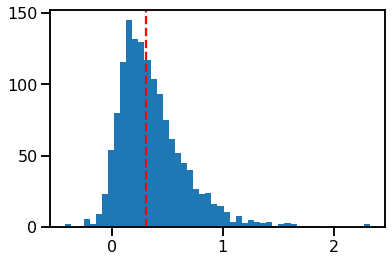

In [551]:
snr_cell_arr = np.array([])

for icell in tqdm(df_tidy.cell_id.unique()):
    df_cell = df_tidy[(df_tidy.cell_id == icell) & (df_tidy.resp_id == 'R1')] # only calc R1 SNR
    signal = df_cell.groupby(['stim_id'])['dfof'].mean()
    noise = df_cell.groupby(['stim_id'])['dfof'].std()
    snr = signal / noise # single cell snr of each stim
    snr_cell = np.median(snr) # median snr across all stims
    snr_cell_arr = np.append(snr_cell_arr, snr_cell)

snr_thres = np.percentile(snr_cell_arr, 50)
print(f'snr_thres: {snr_thres:.2f}')

plt.hist(snr_cell_arr, bins=50);
plt.axvline(snr_thres, color='r', linestyle='--');

In [555]:
df_tidy['filter_cell_snr'] = False
for (icell, cell_id) in enumerate(df_tidy.cell_id.unique()):
    snr_cell = snr_cell_arr[icell]
    if snr_cell >= snr_thres:
        df_tidy.loc[df_tidy.cell_id == cell_id, 'filter_cell_snr'] = True

try:
    import math
    assert math.isclose(0.5, df_tidy.filter_cell_snr.sum() / len(df_tidy), abs_tol=0.01)
except:
    print(df_tidy.filter_cell_snr.sum() / len(df_tidy))

df_tidy

0.5127193760545525


,dfof,cell_id,trial_id,stim_id,resp_id,filter_trial,filter_cell,filter_cell_stim,mouse,date,stim_id_ori,filter_cell_snr
0,-0.133319,230103000,0,4,R1,True,True,False,1375,230103,NaN,True
1,0.113303,230103000,1,2,R1,True,True,True,1375,230103,NaN,True
2,-0.018100,230103000,2,2,R1,True,True,True,1375,230103,NaN,True
3,-0.032178,230103000,3,3,R1,True,True,True,1375,230103,NaN,True
4,-0.065120,230103000,4,2,R1,True,True,True,1375,230103,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3088983,-0.023467,220623119,640,0,R2,True,True,False,1372,220623,1.0,False
3088984,0.015559,220623119,641,3,R2,False,True,False,1372,220623,8.0,False
3088985,-0.109568,220623119,642,0,R2,False,True,False,1372,220623,3.0,False
3088986,-0.038351,220623119,643,3,R2,False,True,False,1372,220623,8.0,False


# tidy data filtered 
discarded invalid trial and cell x stim combo

In [556]:
df_filter = df_tidy[df_tidy['filter_cell'] # vis driven filter
                    # & df_tidy['filter_cell_stim'] # img driven filter
                    # & df_tidy['filter_cell_snr'] # snr filter
                    # & df_tidy['filter_trial']
                    ]

df_filter#.sample(5, random_state=42)
# df_filter.stim_id.value_counts() // df_filter.cell_id.nunique() // 2 # 2 is for R1 and R2. each stim repeat 130+ times

,dfof,cell_id,trial_id,stim_id,resp_id,filter_trial,filter_cell,filter_cell_stim,mouse,date,stim_id_ori,filter_cell_snr
0,-0.133319,230103000,0,4,R1,True,True,False,1375,230103,NaN,True
1,0.113303,230103000,1,2,R1,True,True,True,1375,230103,NaN,True
2,-0.018100,230103000,2,2,R1,True,True,True,1375,230103,NaN,True
3,-0.032178,230103000,3,3,R1,True,True,True,1375,230103,NaN,True
4,-0.065120,230103000,4,2,R1,True,True,True,1375,230103,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3088983,-0.023467,220623119,640,0,R2,True,True,False,1372,220623,1.0,False
3088984,0.015559,220623119,641,3,R2,False,True,False,1372,220623,8.0,False
3088985,-0.109568,220623119,642,0,R2,False,True,False,1372,220623,3.0,False
3088986,-0.038351,220623119,643,3,R2,False,True,False,1372,220623,8.0,False


# adaptation vs SF
## construct filter_pref

In [557]:
df_pref = df_filter.copy()
df_pref['filter_pref'] = False

# for each cell, find the stim with the largest resp
for icell in df_filter.cell_id.unique():
    df_cell = df_pref[df_pref['cell_id']==icell]
    df_cell = df_cell[df_cell['resp_id']=='R1'] # only use R1
    if len(df_cell) == 0:
        continue
    df_cell = df_cell.sort_values(by='dfof', ascending=False) # sort by dfof, largest first
    pref_stim = df_cell.iloc[0]['stim_id'] # stim id of the largest resp
    df_pref.loc[(df_pref['cell_id']==icell) & (df_pref['stim_id']==pref_stim), 'filter_pref'] = True

df_pref = df_pref[df_pref['filter_pref']] # only retain preferred stim x cell combo
df_pref

,dfof,cell_id,trial_id,stim_id,resp_id,filter_trial,filter_cell,filter_cell_stim,mouse,date,stim_id_ori,filter_cell_snr,filter_pref
3,-0.032178,230103000,3,3,R1,True,True,True,1375,230103,NaN,True,True
5,-0.008223,230103000,5,3,R1,False,True,True,1375,230103,NaN,True,True
7,-0.014856,230103000,7,3,R1,False,True,True,1375,230103,NaN,True,True
9,0.055654,230103000,9,3,R1,True,True,True,1375,230103,NaN,True,True
23,0.021640,230103000,23,3,R1,False,True,True,1375,230103,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088952,-0.026286,220623119,609,4,R2,True,True,False,1372,220623,9.0,False,True
3088956,0.283916,220623119,613,4,R2,True,True,False,1372,220623,9.0,False,True
3088966,0.007908,220623119,623,4,R2,True,True,False,1372,220623,9.0,False,True
3088967,0.033100,220623119,624,4,R2,True,True,False,1372,220623,9.0,False,True


### can change SF range
check if cells preferring extreme SF still is responsive to middle SF -> decide if change grat6SF cpd parameters

In [641]:
extreme_pref = df_pref[
                    # (df_pref.stim_id == df_pref.stim_id.min()) | 
                     (df_pref.stim_id == df_pref.stim_id.max()) # highest SF was discarded in final adp-SF plot anyway
                     | (df_pref.stim_id == df_pref.stim_id.max() - 1) # so maybe we care about the 2nd highest SF
                     ].sort_values(by='stim_id')
extreme_pref_cell = extreme_pref.cell_id.unique() # cells who prefer extreme SF

tmp = df_tidy[df_tidy.cell_id.isin(extreme_pref_cell)]
stim_id_not_extreme = np.sort(df_tidy.stim_id.unique())[1:-1]
tmp = tmp[tmp.stim_id.isin(stim_id_not_extreme)] # are they responsive to non-extreme SF?
tmp = tmp.groupby('stim_id')['filter_cell_stim'].sum() / tmp.groupby('stim_id')['filter_cell_stim'].count() # proportion of cells who prefer extreme SF AND responsive to each non-extreme SF
print(tmp)

print('we can still change SF param, since some cells who prefer extreme SF are responsive to each non-extreme SF')

stim_id
1    0.443424
2    0.381392
3    0.307465
4    0.294804
Name: filter_cell_stim, dtype: float64
we can still change SF param, since some cells who prefer extreme SF are responsive to each non-extreme SF


## boot adp for pop

In [635]:
# output should be of shape: nboot x nstim x ncell
# for each bootstrap, for each stim x cell, randomly select nrep trials

nboot = 100
nrep_selected = 30 # dictated by grat1 adp stability test

adp_boot = []
for iboot in tqdm(np.arange(nboot)):
    R1_agg = (df_pref[(df_pref['resp_id']=='R1')]
                    .groupby(['stim_id', 'cell_id'])['dfof']
                    .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                    .reset_index()['dfof'].values) # for each stim x cell, randomly select nrep trials resp, take sum
    R2_agg = (df_pref[(df_pref['resp_id']=='R2')]
                    .groupby(['stim_id', 'cell_id'])['dfof']
                    .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                    .reset_index()['dfof'].values)
    adp_agg = (R2_agg - R1_agg) / (R2_agg + R1_agg + 1e-7)
    adp_agg[np.abs(adp_agg) > 5] = np.nan # remove outliers
    # adp_agg[np.abs(R1_agg) < 0.001] = np.nan # remove outliers

    adp_boot.append(adp_agg)
print('adp hard thresholding')
# print('using adp as diff, not ratio')

adp_boot = np.array(adp_boot)

100%|██████████| 100/100 [01:02<00:00,  1.61it/s]

adp hard thresholding


In [636]:
# preferred stim x cell combo

df_adp_pref = (df_pref[(df_pref['resp_id']=='R1')]
                .groupby(['stim_id', 'cell_id'])['dfof']
                .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum()) # dfof col was not used
                .reset_index())

# agg_method = np.nanmedian
agg_method = np.nanmean
adp_boot_agg = agg_method(adp_boot, axis=0) # sum over all bootstraps
df_adp_pref['adp_pref'] = adp_boot_agg
df_adp_pref = df_adp_pref.dropna(subset=['adp_pref']) # remove nan, which is adp outliers
df_adp_pref.tail(), df_adp_pref.shape, df_adp_pref.stim_id.max()

(      stim_id    cell_id      dfof  adp_pref
 1330        5  230209125  0.296707  0.061487
 1331        5  230214014  0.893241 -0.532607
 1332        5  230214022  0.403689 -0.782872
 1333        5  230214068  0.056731  0.026880
 1334        5  230214142 -0.184293 -0.078375,
 (1335, 4),
 5)

### boxplot across cells
for each SF, take cells that prefer this grating SF. boxplot errorbar is across cells

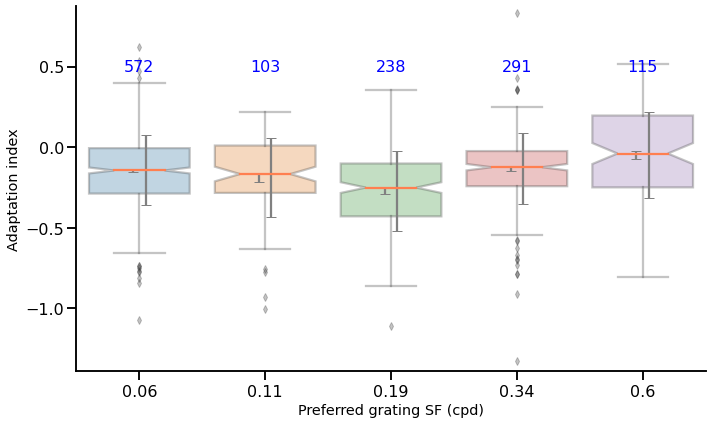

In [637]:
# for each stim_id, plot adp_pref for each cell in a boxplot

df_adp_pref = df_adp_pref[df_adp_pref.stim_id < 5] # discard highest SF, due to no cell prefer it

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='stim_id', y='adp_pref', data=df_adp_pref, ax=ax, 
            notch=True, 
            boxprops=dict(alpha=.3), 
            whiskerprops=dict(alpha=.3),
            capprops=dict(alpha=.3),
            flierprops=dict(alpha=.3),
            medianprops={"color": "coral"},
            meanprops={"color": "orange"},)
# sns.swarmplot(x='stim_id', y='adp_pref', data=df_adp_pref, ax=ax, alpha=0.5)

adp_pref_agg = df_adp_pref.groupby('stim_id')['adp_pref'].mean().values
adp_pref_std = df_adp_pref.groupby('stim_id')['adp_pref'].std().values
adp_pref_sem = df_adp_pref.groupby('stim_id')['adp_pref'].sem().values

# ax.plot(np.arange(adp_pref_agg.shape[0])-0.05, adp_pref_agg, 
#         'gray', marker='o', markersize=7, linewidth=1)
ax.errorbar(np.arange(adp_pref_agg.shape[0])+0.05, adp_pref_agg,
            yerr=adp_pref_std, fmt='none', color='gray', capsize=5)
ax.errorbar(np.arange(adp_pref_agg.shape[0])-0.05, adp_pref_agg,
            yerr=adp_pref_sem, fmt='none', color='gray', capsize=5)

# add text at each xtick
ncell_SF = df_adp_pref.groupby('stim_id')['cell_id'].nunique().values # ncell for each stim_id
for i, ncell_iSF in enumerate(ncell_SF):
    ncell_iSF = int(ncell_iSF)
    # ax.text(i, -2.7, ncell_iSF, ha='center', va='center', fontsize=16, color='blue')
    ax.text(i, 0.5, ncell_iSF, ha='center', va='center', fontsize=16, color='blue')

ax.set_xlabel('Preferred grating SF (cpd)')
# cpd_array = np.round(np.geomspace(0.03, 0.9, num=10), 2)[2:-2] # remove low freq and high freq
cpd_array = np.round(SF_ref, 2)[:-1] # discard highest SF, due to no cell prefer it
# try:
ax.set_xticklabels(cpd_array)
# except:
#     ax.set_xticklabels(cpd_array[:-1])
#     assert df_adp_pref.stim_id.max() == 4 # there is no stim_id 5 (highest SF) left after adp thres
ax.set_ylabel('Adaptation index')
# ax.set_ylim([-3, np.nanmax(df_adp_pref['adp_pref'].values * 1.05)])
ax.set_ylim([np.nanmin(df_adp_pref['adp_pref'].values * 1.05), np.nanmax(df_adp_pref['adp_pref'].values * 1.05)])

# turn off upper and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()
fig_dir = r'C:\Users\ll357\Documents\inter\results\adp vs SF/'.replace('\\', '/')
# fig.savefig(os.path.join(fig_dir, 'adp_pref_grat_6SF_trial_filter.pdf'), dpi=300)

### one way anova

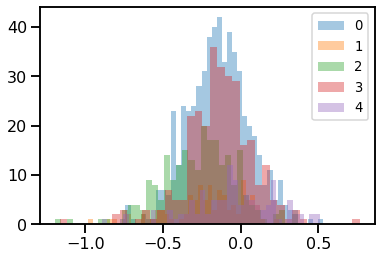

In [601]:
# test assumption of normality: looks maybe normal, need Shapiro-Wilk test

df_adp_pref_dropna = df_adp_pref.dropna(subset=['adp_pref'])
gb = df_adp_pref_dropna.groupby('stim_id')
adp_SF = []
for stim_id, group in gb:
    # print(stim_id)
    # print(group)
    # print(group['adp_pref'].values[:5])
    adp_iSF = group['adp_pref'].values
    adp_SF.append(adp_iSF)
    plt.hist(adp_iSF, bins=40, alpha=0.4, label=stim_id)
plt.legend();

In [602]:
# test assumption of equal variance: looks not equal, need Levene test, bartlett test, or fligner-killeen test
# "ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power" - https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance
adp_SF_var = [np.var(adp_iSF) for adp_iSF in adp_SF]
adp_SF_var

# test assumption of independence: no idea

[0.04057983193516707,
 0.05557400454971144,
 0.05870695089803052,
 0.04718091361774078,
 0.07045883851037829]

In [603]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_adp_pref_dropna = df_adp_pref.dropna()

# perform one-way ANOVA
import scipy.stats as stats
stats.f_oneway(df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==0]['adp_pref'].values,
                df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==1]['adp_pref'].values,
                df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==2]['adp_pref'].values,
                df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==3]['adp_pref'].values,
                df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==4]['adp_pref'].values,
                # df_adp_pref_dropna[df_adp_pref_dropna['stim_id']==5]['adp_pref'].values, # last stim_id has only 1 cell
                )

F_onewayResult(statistic=25.061133445648853, pvalue=5.010501906360863e-20)

### boxplot across boots
for each SF, take cells that prefer this grating SF. boxplot errorbar is across boots (already averaged across cells)

In [604]:
# output should be of shape: nboot x nstim x ncell
# for each bootstrap, for each stim x cell, randomly select nrep trials

nboot = 2000
nrep_selected = 30

adp_boot_pop = []
for iboot in tqdm(np.arange(nboot)):
    R1_agg = (df_pref[(df_pref['resp_id']=='R1')]
                .groupby(['stim_id', 'cell_id'])['dfof']
                .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                .to_frame().reset_index()
                .groupby(['stim_id'])['dfof'] # sum over cells preferring each stim
                .sum().values
                )
    R2_agg = (df_pref[(df_pref['resp_id']=='R1')]
                .groupby(['stim_id', 'cell_id'])['dfof']
                .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                .to_frame().reset_index()
                .groupby(['stim_id'])['dfof']
                .sum().values
                )
    adp_agg = (R2_agg - R1_agg) / (R1_agg + 1e-7)
    adp_agg[np.abs(adp_agg) > 5] = np.nan # remove outliers
    adp_boot_pop.append(adp_agg)
print('adp hard thresholding')

adp_boot_pop = np.array(adp_boot_pop)
adp_boot_pop.shape # nboot x nstim

100%|██████████| 2000/2000 [20:11<00:00,  1.65it/s]

adp hard thresholding


(2000, 6)

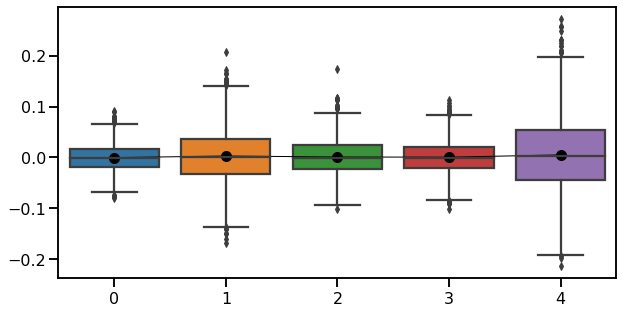

In [606]:
# df_adp_pref_pop = pd.DataFrame(adp_boot_pop, columns=df_adp_pref.stim_id.unique()) # only works if all stim_id survived adp thres
df_adp_pref_pop = pd.DataFrame(adp_boot_pop, columns=np.arange(0, 6)) # pretend that all stim_id survived adp thres
df_adp_pref_pop = df_adp_pref_pop.drop(columns=5) # drop column 5 due to ncell=1
# df_adp_pref_pop

fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_adp_pref_pop, ax=ax)
ax.plot(df_adp_pref_pop.mean().values, 'k', marker='o', markersize=10, linewidth=1)

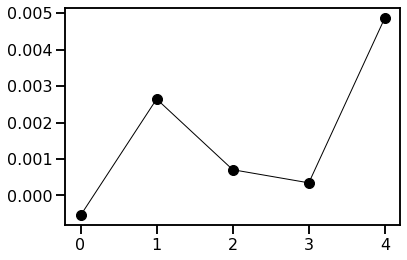

In [609]:
plt.plot(df_adp_pref_pop.mean().values, 'k', marker='o', markersize=10, linewidth=1)

# trial filter impact on adp stability
## using new grat1
copied from grat1_mix50.ipynb  
TODO: refactor

In [4]:
dir_csv = r'Z:\All_Staff\home\lan\Data\2P_images\mat_inter\V1_i1380_230207_cellpose'.replace('\\', '/')
filename = 'df_tidy.csv'
df_tidy = pd.read_csv(os.path.join(dir_csv, filename))
trial_ok = df_tidy.groupby('trial_id').mean()['filter_trial'].astype(bool).values

mouse = 1380
date = 230207
dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'
dir_data += f'V1_i{mouse}_{date}_cellpose'
stim_id, trace_by_trial = adp.load_trace_trial_data(os.path.join(dir_data), vis_filter=False)

# get resp_ad and resp_tg [cell x trial]
base1 = trace_by_trial[:,:,0:2+1].mean(axis=2) # avg over time window frames
resp_ad = trace_by_trial[:,:,9:11+1].mean(axis=2)
resp_ad = resp_ad - base1
base2 = trace_by_trial[:,:,13:14+1].mean(axis=2)
resp_tg = trace_by_trial[:,:,20:22+1].mean(axis=2)
resp_tg = resp_tg - base2
resp_ad.shape, resp_tg.shape

ncell: 135, nstim: 1, ntrial: 1257, nframe: 257


((135, 1257), (135, 1257))

In [5]:
trace_by_trial_ori = trace_by_trial.copy()
stim_id_ori = stim_id.copy()
resp_ad_ori = resp_ad.copy()
resp_tg_ori = resp_tg.copy()

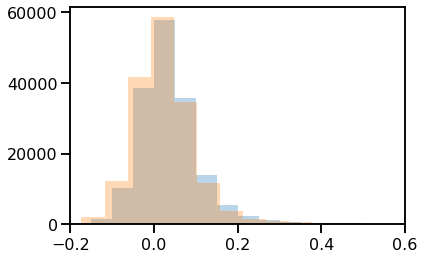

In [6]:
plt.hist(resp_ad.ravel(), bins=100, alpha=0.3, label='AD');
plt.hist(resp_tg.ravel(), bins=100, alpha=0.3, label='TG');
plt.xlim(-0.2, 0.6);

# trace_by_trial.shape, stim_id.shape, resp_ad.shape, resp_tg.shape, trial_ok.shape

## strictness of trial filter
with increasingly strict cutoff of eye mov dist

In [7]:
trial_filter_file = [f for f in os.listdir(dir_data) if f.__contains__('filter_trials_')]
eye_mov = np.array([])
for file in trial_filter_file:
    trial_filter = sio.loadmat(os.path.join(dir_data, file))
    # print(trial_filter.keys())
    # break
    # eye_mov_sess = trial_filter['eye_move_dist'][:-1, :] # remove the last trial, which is not a full trial
    eye_mov_sess = trial_filter['pupil_deviation'][:, :-1].T
    eye_mov = np.append(eye_mov, eye_mov_sess)

eye_mov = np.array(eye_mov)
assert len(trial_ok) == len(eye_mov)

[ 2.18  2.83  3.49  4.13  4.86  5.73  7.13  9.04 32.19]


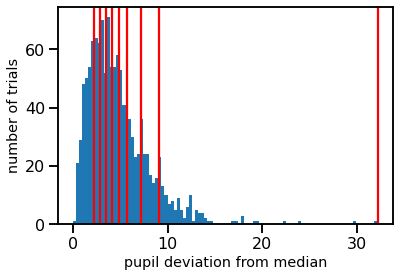

In [8]:
eye_mov_perc = np.percentile(eye_mov, 100), np.percentile(eye_mov, 90), np.percentile(eye_mov, 80), np.percentile(eye_mov, 70), np.percentile(eye_mov, 60), \
np.percentile(eye_mov, 50), np.percentile(eye_mov, 40), np.percentile(eye_mov, 30), np.percentile(eye_mov, 20), # np.percentile(eye_mov, 10)
eye_mov_perc = np.array(eye_mov_perc[::-1])
print(np.round(eye_mov_perc, 2))

# plt.plot(eye_mov_perc, 'k', marker='o', markersize=10, linewidth=1)
# plt.xlabel('percentile')
# plt.ylabel('eye movement distance');

plt.hist(eye_mov, bins=100)
for i in range(len(eye_mov_perc)):
    plt.axvline(eye_mov_perc[i], color='r', linestyle='-')
# plt.xscale('log')
# plt.xlim(0, 10);
plt.xlabel('pupil deviation from median')
plt.ylabel('number of trials');

cutoff: 2.2, ntrial: 255
cutoff: 2.8, ntrial: 373
cutoff: 3.5, ntrial: 504
cutoff: 4.1, ntrial: 622
cutoff: 4.9, ntrial: 762
cutoff: 5.7, ntrial: 876
cutoff: 7.1, ntrial: 1002
cutoff: 9.0, ntrial: 1129
cutoff: 32.2, ntrial: 1257


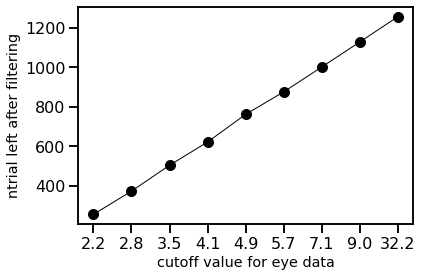

In [9]:
eye_mov_perc = np.round(eye_mov_perc, 1)
trial_ok_cutoff_arr = []
for cutoff in eye_mov_perc:
    trial_ok_cutoff = eye_mov < cutoff # trials with eye movement less than cutoff are good
    trial_ok_cutoff_arr.append(trial_ok_cutoff)
    print(f'cutoff: {cutoff:.1f}, ntrial: {trial_ok_cutoff.sum()}')
trial_ok_cutoff_arr = np.array(trial_ok_cutoff_arr)

plt.plot(trial_ok_cutoff_arr.sum(axis=1), 'k', marker='o', markersize=10, linewidth=1)
plt.xlabel('cutoff value for eye data')
plt.xticks(np.arange(0, 9), np.round(eye_mov_perc, 1));
plt.ylabel('ntrial left after filtering');

In [31]:
def get_adp_stability(trace_by_trial, stim_id, resp_ad, resp_tg, mode='adp'):
    # mean_or_median = np.median # for population, median is better than mean
    mean_or_median = np.median
    resp_ad_pop = mean_or_median(resp_ad, axis=0) # population response as avg or median of all cells for each trial
    resp_tg_pop = mean_or_median(resp_tg, axis=0)

    # shuffle resp_ad_pop and resp_tg_pop the same way
    np.random.seed(42)
    idx = np.random.permutation(resp_ad_pop.shape[0])
    resp_ad_pop_shuf = resp_ad_pop[idx]
    resp_tg_pop_shuf = resp_tg_pop[idx]

    # for whole population, loop thru trial numbers to group together to get a stable adaptation value  
    adp_agg = []
    adp_std = []
    for group_size in np.arange(1, trace_by_trial.shape[1] // 5): # >= n groups of trials
        ngroup = trace_by_trial.shape[1] // group_size

        resp_ad_cut = resp_ad_pop_shuf[:group_size*ngroup].reshape(ngroup, group_size) # reshape to ngroup x group_size
        resp_tg_cut = resp_tg_pop_shuf[:group_size*ngroup].reshape(ngroup, group_size)
        resp_ad_group = mean_or_median(resp_ad_cut, axis=1) # aggregate resp within group of trials
        resp_tg_group = mean_or_median(resp_tg_cut, axis=1)

        adp_group = (resp_tg_group - resp_ad_group) / (resp_tg_group + resp_ad_group + 1e-7) # calc adp with `avg resp within group`
        if mode == 'R1':
            adp_group = resp_ad_group
        adp_group_agg = mean_or_median(adp_group) # agg adp across group
        adp_group_std = np.std(adp_group) # std of adp across group
        adp_agg.append(adp_group_agg) # group_size variable, all cell resp agg
        adp_std.append(adp_group_std)

    adp_agg = np.array(adp_agg)
    adp_std = np.array(adp_std)
    adp_sem = adp_std / np.sqrt(adp_std.shape[0])

    # for each cell, same as above
    ncell = trace_by_trial.shape[0]
    ngroup_min = 2
    nsize = len(np.arange(1, trace_by_trial.shape[1] // ngroup_min)) # how many group_size to test
    adp_cell_agg = np.zeros((ncell, nsize))
    adp_cell_std = np.zeros((ncell, nsize))
    adp_cell_sem = np.zeros((ncell, nsize))

    for icell in np.arange(ncell):
        resp_ad_cell = resp_ad[icell, :]
        resp_tg_cell = resp_tg[icell, :]

        # shuffle resp_ad_pop and resp_tg_pop the same way
        np.random.seed(42)
        idx = np.random.permutation(resp_ad_pop.shape[0])
        resp_ad_cell_shuf = resp_ad_cell[idx]
        resp_tg_cell_shuf = resp_tg_cell[idx]

        for isize, group_size in enumerate(np.arange(1, trace_by_trial.shape[1] // ngroup_min)):
            ngroup = trace_by_trial.shape[1] // group_size

            resp_ad_cut = resp_ad_cell_shuf[:group_size*ngroup].reshape(ngroup, group_size)
            resp_tg_cut = resp_tg_cell_shuf[:group_size*ngroup].reshape(ngroup, group_size)
            resp_ad_group = mean_or_median(resp_ad_cut, axis=1)
            resp_tg_group = mean_or_median(resp_tg_cut, axis=1)

            adp_group = (resp_tg_group - resp_ad_group) / (resp_tg_group + resp_ad_group + 1e-7)
            if mode == 'R1':
                adp_group = resp_ad_group
            adp_group_agg = mean_or_median(adp_group)
            adp_group_std = np.std(adp_group)
            adp_group_sem = adp_group_std / np.sqrt(adp_group.shape[0])
            adp_cell_agg[icell, isize] = adp_group_agg
            adp_cell_std[icell, isize] = adp_group_std
            adp_cell_sem[icell, isize] = adp_group_sem

    adp_cell_agg_agg = mean_or_median(adp_cell_agg, axis=0)
    adp_cell_std_agg = mean_or_median(adp_cell_std, axis=0)
    adp_cell_sem_agg = mean_or_median(adp_cell_sem, axis=0) # adp error between groups -> agg across cells

    return adp_cell_agg_agg, adp_cell_sem_agg, adp_cell_std_agg, adp_agg, adp_sem, adp_std

In [39]:
def plot_adp_stability(adp_cell_agg_agg, adp_cell_sem_agg, adp_agg, adp_sem, ax_id, xlim_bool=True, err_only=False, colors=['blue', 'red'], mode='adp'):

    if err_only == False:
        x = np.arange(1, adp_cell_agg_agg.shape[0]+1)
        ax_id.plot(x, adp_cell_agg_agg, '-', color='blue', linewidth=3, alpha=0.7, label='single neurons')
        ax_id.fill_between(x,  
                        adp_cell_agg_agg + adp_cell_sem_agg, adp_cell_agg_agg - adp_cell_sem_agg, color='b', alpha=0.2)

        x = np.arange(1, adp_agg.shape[0]+1)
        ax_id.plot(x, adp_agg, '-', color='red', linewidth=3, alpha=0.3, label='population')
        ax_id.fill_between(x, 
                        adp_agg + adp_sem, adp_agg - adp_sem, 
                        color='r', alpha=0.2)
        # ax_id.set_ylim(-1, 0)
        ax_id.axhline(0, color='k', linewidth=1, linestyle='--')

    elif err_only: # only plot error
        x = np.arange(1, adp_cell_agg_agg.shape[0]+1)
        ax_id.plot(x, adp_cell_sem_agg, '-', color=colors[0], linewidth=3, alpha=0.7, label='single neurons')

        x = np.arange(1, adp_agg.shape[0]+1)
        ax_id.plot(x, adp_sem, '-', color=colors[1], linewidth=3, alpha=0.5, label='population')
        ax_id.set_ylim(0, 1) # mean_or_median = median
        # ax_id.set_ylim(0, 10) # mean_or_median = mean
        if mode == 'R1':
            ax_id.set_ylim(0, 0.1)
        ax_id.axhline(0.1, color='k', linewidth=1, linestyle='--')

    # text at bottom right
    ax_id.text(0.95, 0.95, f'cutoff = {eye_mov_perc[i]}',
            verticalalignment='top', horizontalalignment='right',
            transform=ax_id.transAxes,
            color='blue', fontsize=14)

    if xlim_bool:
        ax_id.set_xlim(0, 40)

### adp err only

In [45]:
ncutoff = trial_ok_cutoff_arr.shape[0] # trial_ok_cutoff_arr.shape = ncutoff, ntrial
adp_cell_cutoff = []
adp_cell_sem_cutoff = []
adp_pop_cutoff = []
adp_pop_sem_cutoff = []

for i in tqdm(range(ncutoff)):
    trial_ok = trial_ok_cutoff_arr[i, :]
    trace_by_trial = trace_by_trial_ori[:, trial_ok, :]
    stim_id = stim_id_ori[0][trial_ok]
    resp_ad = resp_ad_ori[:, trial_ok]
    resp_tg = resp_tg_ori[:, trial_ok]

    adp_cell_agg_agg, adp_cell_sem_agg, adp_cell_std_agg, adp_agg, adp_sem, adp_std = get_adp_stability(trace_by_trial, stim_id, resp_ad, resp_tg)
    adp_cell_cutoff.append(adp_cell_agg_agg)
    adp_cell_sem_cutoff.append(adp_cell_sem_agg)
    adp_pop_cutoff.append(adp_agg)
    adp_pop_sem_cutoff.append(adp_sem)

adp_cell_cutoff.__len__(), adp_cell_cutoff[0].shape, adp_cell_cutoff[1].shape, 

100%|██████████| 9/9 [01:10<00:00,  7.88s/it]


(9, (126,), (185,))

use median to aggregate across trials (for grouped adaptation index) and cells (for population response) yields higher adp stability. but essentially the same result as np.mean: we take 30 trials to aggregate for single cell adp, and 10 trials for population adp.


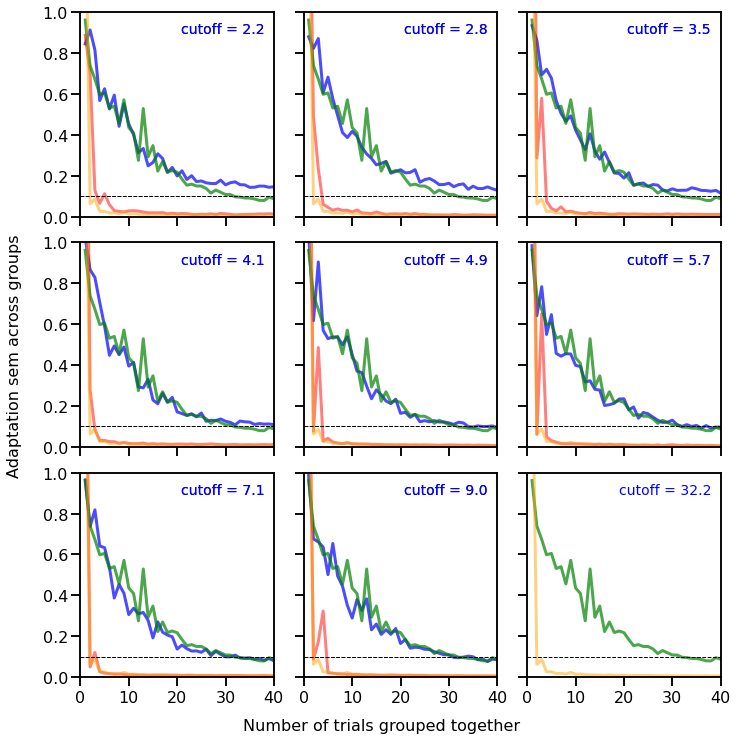

In [46]:
f, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10)) # 3x3 subplots for 9 cutoffs
f.text(0.5, -0.02, 'Number of trials grouped together', ha='center', fontsize=16)
f.text(-0.02, 0.5, 'Adaptation sem across groups', va='center', rotation='vertical', fontsize=16)

for i in (range(ncutoff-1)):
    adp_cell_agg_agg = adp_cell_cutoff[i]
    adp_cell_sem_agg = adp_cell_sem_cutoff[i]
    adp_agg = adp_pop_cutoff[i]
    adp_sem = adp_pop_sem_cutoff[i]
    plot_adp_stability(adp_cell_agg_agg, adp_cell_sem_agg, adp_agg, adp_sem, ax[i//3, i%3], xlim_bool=True, err_only=True)

for i in (range(ncutoff)):
    plot_adp_stability(adp_cell_cutoff[-1], adp_cell_sem_cutoff[-1], adp_pop_cutoff[-1], adp_pop_sem_cutoff[-1], ax[i//3, i%3], xlim_bool=True, err_only=True, colors=['green', 'orange'])

f.tight_layout()

print('use median to aggregate across trials (for grouped adaptation index) and cells (for population response) yields higher adp stability. but essentially the same result as np.mean: we take 30 trials to aggregate for single cell adp, and 10 trials for population adp.')

### R1 err

In [34]:
adp_cell_cutoff = []
adp_cell_err_cutoff = []
adp_pop_cutoff = []
adp_pop_err_cutoff = []

for i in tqdm(range(ncutoff)):
    trial_ok = trial_ok_cutoff_arr[i, :]
    trace_by_trial = trace_by_trial_ori[:, trial_ok, :]
    stim_id = stim_id_ori[0][trial_ok]
    resp_ad = resp_ad_ori[:, trial_ok]
    resp_tg = resp_tg_ori[:, trial_ok]

    adp_cell_agg_agg, adp_cell_sem_agg, adp_cell_std_agg, adp_agg, adp_sem, adp_std = get_adp_stability(trace_by_trial, stim_id, resp_ad, resp_tg, mode='R1')
    adp_cell_cutoff.append(adp_cell_agg_agg)
    adp_cell_err_cutoff.append(adp_cell_std_agg)
    adp_pop_cutoff.append(adp_agg)
    adp_pop_err_cutoff.append(adp_std)

adp_cell_cutoff.__len__(), adp_cell_cutoff[0].shape, adp_cell_cutoff[1].shape, 

100%|██████████| 9/9 [01:10<00:00,  7.85s/it]


(9, (126,), (185,))

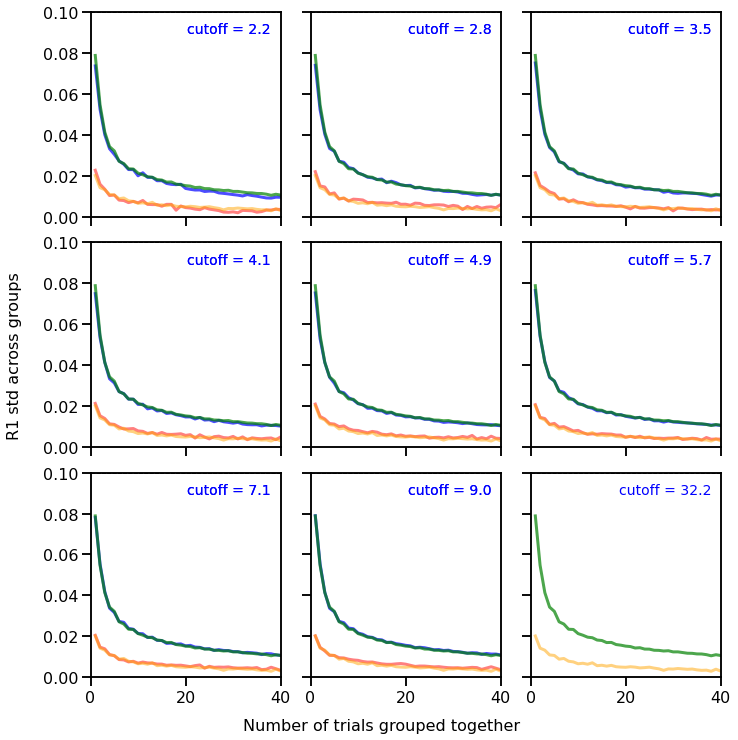

In [43]:
f, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10)) # 3x3 subplots for 9 cutoffs
f.text(0.5, -0.02, 'Number of trials grouped together', ha='center', fontsize=16)
f.text(-0.02, 0.5, 'R1 std across groups', va='center', rotation='vertical', fontsize=16)

for i in (range(ncutoff-1)):
    adp_cell_agg_agg = adp_cell_cutoff[i]
    adp_cell_err_agg = adp_cell_err_cutoff[i]
    adp_agg = adp_pop_cutoff[i]
    adp_err = adp_pop_err_cutoff[i]
    plot_adp_stability(adp_cell_agg_agg, adp_cell_err_agg, adp_agg, adp_err, ax[i//3, i%3], xlim_bool=True, err_only=True, mode='R1')

for i in (range(ncutoff)):
    plot_adp_stability(adp_cell_cutoff[-1], adp_cell_err_cutoff[-1], adp_pop_cutoff[-1], adp_pop_err_cutoff[-1], ax[i//3, i%3], xlim_bool=True, err_only=True, colors=['green', 'orange'], mode='R1')

f.tight_layout()

In [ ]:
# looks like the less we cut off (by eye movement distance or by pupil deviation from median), the more stable the adaptation index is

## adp stability over boots
not over groups of trials

In [49]:
# filter df_tidy
df_filter = df_tidy[df_tidy['filter_cell'] # vis driven filter
                    # & df_tidy['filter_cell_stim'] # img driven filter
                    # & df_tidy['filter_trial']
                    ]
df_filter                    

,dfof,cell_id,trial_id,stim_id,resp_id,filter_trial,filter_cell,filter_cell_stim
1257,-0.044027,1,0,0,R1,False,True,True
1258,0.049366,1,1,0,R1,True,True,True
1259,0.043668,1,2,0,R1,True,True,True
1260,0.073826,1,3,0,R1,True,True,True
1261,0.053160,1,4,0,R1,True,True,True
...,...,...,...,...,...,...,...,...
335614,-0.032953,131,1252,0,R2,True,True,True
335615,0.061504,131,1253,0,R2,False,True,True
335616,0.028452,131,1254,0,R2,False,True,True
335617,0.030008,131,1255,0,R2,False,True,True


In [55]:
# output should be of shape: nboot x ncell
# for each bootstrap, for each cell, randomly select nrep trials

nboot = 100
nrep_selected = 30 # dictated by grat1 adp stability test

adp_boot = []
for iboot in tqdm(np.arange(nboot)):
    R1_agg = (df_filter[(df_filter['resp_id']=='R1')]
                    .groupby(['cell_id'])
                    ['dfof']
                    .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                    .reset_index()['dfof'].values) # for each stim x cell, randomly select nrep trials resp, take sum
    R2_agg = (df_filter[(df_filter['resp_id']=='R2')]
                    .groupby(['cell_id'])
                    ['dfof']
                    .apply(lambda x: x.sample(n=nrep_selected, replace=True).sum())
                    .reset_index()['dfof'].values)
    adp_agg = (R2_agg - R1_agg) / (R2_agg + R1_agg + 1e-7)
    adp_agg[np.abs(adp_agg) > 5] = np.nan # remove outliers
    # adp_agg[np.abs(R1_agg) < 0.001] = np.nan # remove outliers

    adp_boot.append(adp_agg)
print('adp hard thresholding')
# print('using adp as diff, not ratio')

adp_boot = np.array(adp_boot)
adp_boot.shape

100%|██████████| 100/100 [00:03<00:00, 33.20it/s]

adp hard thresholding


(100, 38)